# Predicting Numeric Outcomes with Linear Regression

**Aim**: The aim of this notebook is to predict the amount of a mobile transaction (numeric outcome) given all the other features in the dataset.

## Table of contents

1. Linear Regression in 2-Dimensions
2. Linear Regression to predict transaction amount
3. Model Optimization

## Package requirements

In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import warnings

In [2]:
#Reading in the dataset

df = pd.read_csv('fraud_prediction.csv')

In [4]:
#Define the feature and target arrays

feature = df['oldbalanceOrig'].values
target = df['amount'].values

## Linear Regression in 2-Dimensions

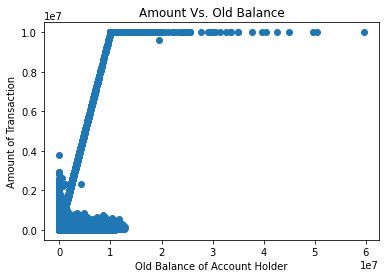

In [5]:
#Creating a scatter plot

plt.scatter(feature, target)
plt.xlabel('Old Balance of Account Holder')
plt.ylabel('Amount of Transaction')
plt.title('Amount Vs. Old Balance')
plt.show()

**Building the linear regression model**

In [12]:
#Initializing a linear regression model 

linear_reg = linear_model.LinearRegression()

#Reshaping the array since we only have a single feature

feature = feature.reshape(-1, 1)
target = target.reshape(-1, 1)

#Fitting the model on the data

linear_reg.fit(feature, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

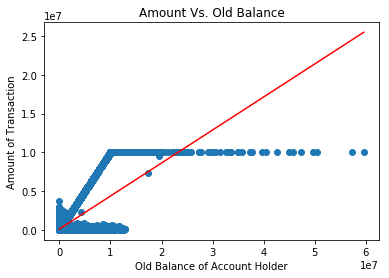

In [17]:
#Define the limits of the x-axis 

x_lim = np.linspace(min(feature), max(feature)).reshape(-1, 1)

#Creating the scatter plot

plt.scatter(feature, target)
plt.xlabel('Old Balance of Account Holder')
plt.ylabel('Amount of Transaction')
plt.title('Amount Vs. Old Balance')

#Creating the prediction line 

plt.plot(x_lim, linear_reg.predict(x_lim), color = 'red')

#Show the plot

plt.show()

## Linear Regression to predict transaction amount

In [3]:
# Reading in the dataset 

df = pd.read_csv('fraud_prediction.csv')

In [4]:
#Creating the features 

features = df.drop('isFraud', axis = 1).values
target = df['isFraud'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify = target)

**Fitting and evaluating the accuracy of the linear regression model**

In [8]:
#Initializing a linear regression model 

linear_reg = linear_model.LinearRegression()

In [10]:
#Fitting the model on the data

linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
#Accuracy of the model

linear_reg.score(X_test, y_test)

0.98579848177097251

**Scaling your data**

In [16]:
#Setting up the scaling pipeline 

pipeline_order = [('scaler', StandardScaler()), ('linear_reg', linear_model.LinearRegression())]

pipeline = Pipeline(pipeline_order)

#Fitting the classfier to the scaled dataset 

linear_reg_scaled = pipeline.fit(X_train, y_train)

#Extracting the score 

linear_reg_scaled.score(X_test, y_test)

0.98579848176994012

## Model Optimization

**Ridge Regression**

In [18]:
# Reading in the dataset 

df = pd.read_csv('fraud_prediction.csv')

In [19]:
#Creating the features 

features = df.drop('isFraud', axis = 1).values
target = df['isFraud'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify = target)

In [21]:
#Initialize a ridge regression model

ridge_reg = Ridge(alpha = 0, normalize = True)

In [22]:
#Fit the model to the training data 

ridge_reg.fit(X_train, y_train)

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001)

In [23]:
#Extract the score from the test data

ridge_reg.score(X_test, y_test)

0.98579848176994034

**Optimizing alpha using GridSearchCV**

In [26]:
#Building the model  

ridge_regression = Ridge()

#Using GridSearchCV to search for the best parameter

grid = GridSearchCV(ridge_regression, {'alpha':[0.0001, 0.001, 0.01, 0.1, 10]})
grid.fit(X_train, y_train)

# Print out the best parameter

print("The most optimal value of alpha is:", grid.best_params_)

The most optimal value of alpha is: {'alpha': 0.01}


In [29]:
#Initializing an ridge regression object

ridge_regression = Ridge(alpha = 0.01)

#Fitting the model to the training and test sets

ridge_regression.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
#Accuracy score of the ridge regression model

ridge_regression.score(X_test, y_test)

0.98579844599883282

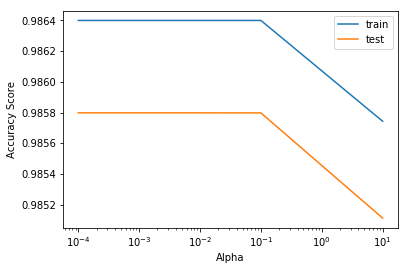

In [31]:
train_errors = []
test_errors = []

alpha_list = [0.0001, 0.001, 0.01, 0.1, 10]

# Evaluate the training and test classification errors for each value of alpha

for value in alpha_list:
    
    # Create Ridge object and fit
    ridge_regression = Ridge(alpha= value)
    ridge_regression.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errors.append(ridge_regression.score(X_train, y_train) )
    test_errors.append(ridge_regression.score(X_test, y_test))
    
# Plot results
plt.semilogx(alpha_list, train_errors, alpha_list, test_errors)
plt.legend(("train", "test"))
plt.ylabel('Accuracy Score')
plt.xlabel('Alpha')
plt.show()

**Lasso Regression**

In [33]:
# Reading in the dataset 

df = pd.read_csv('fraud_prediction.csv')

In [34]:
#Creating the features 

features = df.drop('isFraud', axis = 1).values
target = df['isFraud'].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify = target)

In [36]:
#Initialize a lasso regression model

lasso_reg = Lasso(alpha = 0, normalize = True)

In [43]:
#Fit the model to the training data 

lasso_reg.fit(X_train, y_train)

warnings.filterwarnings('ignore')

In [44]:
#Extract the score from the test data

lasso_reg.score(X_test, y_test)

0.98579848163563688

**Optimizing alpha using GridSearchCV**

In [45]:
#Building the model  

lasso_regression = Lasso()

#Using GridSearchCV to search for the best parameter

grid = GridSearchCV(lasso_regression, {'alpha':[0.0001, 0.001, 0.01, 0.1, 10]})
grid.fit(X_train, y_train)

# Print out the best parameter

print("The most optimal value of alpha is:", grid.best_params_)

The most optimal value of alpha is: {'alpha': 0.0001}


In [46]:
#Initializing an lasso regression object

lasso_regression = Lasso(alpha = 0.0001)

#Fitting the model to the training and test sets

lasso_regression.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
#Accuracy score of the lasso regression model

lasso_regression.score(X_test, y_test)

0.98576284355162636

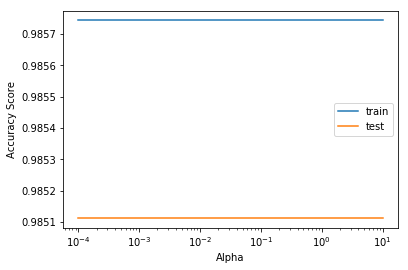

In [48]:
train_errors = []
test_errors = []

alpha_list = [0.0001, 0.001, 0.01, 0.1, 10]

# Evaluate the training and test classification errors for each value of alpha

for value in alpha_list:
    
    # Create Lasso object and fit
    lasso_regression = Lasso(alpha= value)
    lasso_regression.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errors.append(ridge_regression.score(X_train, y_train) )
    test_errors.append(ridge_regression.score(X_test, y_test))
    
# Plot results
plt.semilogx(alpha_list, train_errors, alpha_list, test_errors)
plt.legend(("train", "test"))
plt.ylabel('Accuracy Score')
plt.xlabel('Alpha')
plt.show()